<a href="https://colab.research.google.com/github/nithishvaran/Electronic_Ears/blob/main/Electronic_Ears.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; 
sns.set()
import pandas as pd
import nltk 
import nltk.corpus

In [ ]:
data = pd.read_csv("db.csv")
data

,Description,Target
0,I am planning to submit this by next week,Not Distracted
1,can we all go for a trip goa chennai may be,Distracted
2,Project submission deadline is nearing,Not Distracted
3,I completed and submitted a module in the project,Not Distracted
4,can we make any further updates to the project,Not Distracted
5,I though of a beautiful idea to our project,Not Distracted
6,"Let's chill from now, movies are coming this d...",Distracted
7,I was hanging out with all my friend last nigh...,Distracted
8,Our boss has asked us to do some quality team ...,Not Distracted
9,I spoke with all our team members last working...,Not Distracted


In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
special_charecters = '''!()-[]{};:'"\,<>./?@#$%^&*_~`+|'''
def remove_special_charecters(text):
    newString = ""
    for x in text:
        if x not in special_charecters:
            newString = newString + x
    return newString

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
def remove_stopwords(txt_tokenized):
    txt_clean = [word for word in txt_tokenized if word not in stopwords]
    return txt_clean

In [ ]:
new_df = pd.DataFrame()
data['Description'] = data['Description'].apply(lambda x:  remove_special_charecters(x))
new_df['Tokenized_Description']=data['Description'].apply(lambda x:  word_tokenize(x))
new_df['no_stop_words']=new_df['Tokenized_Description'].apply(lambda x:  remove_stopwords(x))
new_df['Final_Description'] = new_df['no_stop_words'].apply(lambda x: (' '.join(x)))
new_df['Target'] = data['Target']
new_df.head()

,Tokenized_Description,no_stop_words,Final_Description,Target
0,"[I, am, planning, to, submit, this, by, next, ...","[I, planning, submit, next, week]",I planning submit next week,Not Distracted
1,"[can, we, all, go, for, a, trip, goa, chennai,...","[go, trip, goa, chennai, may]",go trip goa chennai may,Distracted
2,"[Project, submission, deadline, is, nearing]","[Project, submission, deadline, nearing]",Project submission deadline nearing,Not Distracted
3,"[I, completed, and, submitted, a, module, in, ...","[I, completed, submitted, module, project]",I completed submitted module project,Not Distracted
4,"[can, we, make, any, further, updates, to, the...","[make, updates, project]",make updates project,Not Distracted


In [ ]:
from sklearn.model_selection import train_test_split
Independent_var = new_df.Final_Description
Dependent_var = new_df.Target
IV_train, IV_test, DV_train, DV_test = train_test_split(Independent_var,Dependent_var,test_size=0.1, random_state=1)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix,accuracy_score,plot_confusion_matrix

model = make_pipeline(TfidfVectorizer(),MultinomialNB())

model.fit(IV_train,DV_train)

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('multinomialnb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

Accuracy Score:  1.0


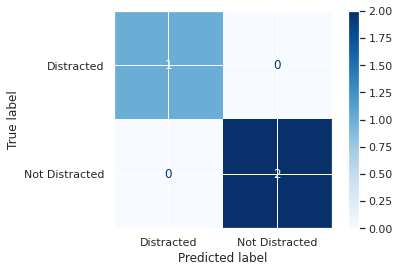

In [ ]:
labels = model.predict(IV_test)
print("Accuracy Score: ", accuracy_score(DV_test,labels))
disp = plot_confusion_matrix(model,IV_test,DV_test,cmap='Blues')

In [ ]:
import joblib
import os

#path = "final.sav"
#assert os.path.isfile(path)
#with open(path,'wb') as f:
#joblib.dump(model,f)